**A.Preprocessing**

In [26]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df= pd.read_excel(io.BytesIO(uploaded['CollectedData.xlsx']),'Sheet2')
df.info()


Saving CollectedData.xlsx to CollectedData (3).xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   8.0                 12561 non-null  float64
 1   1.0                 12562 non-null  float64
 2   Unnamed: 2          9650 non-null   float64
 3   0.0                 12340 non-null  float64
 4   1993.0              11213 non-null  float64
 5   146.0               12549 non-null  float64
 6   Unnamed: 6          9746 non-null   float64
 7   2.0                 12510 non-null  float64
 8   1.0.1               12514 non-null  float64
 9   Unnamed: 9          3354 non-null   float64
 10  Unnamed: 10         11778 non-null  float64
 11  Unnamed: 11         4638 non-null   float64
 12  Unnamed: 12         3371 non-null   float64
 13  Unnamed: 13         5623 non-null   float64
 14  Unnamed: 14         4909 non-null   float64
 15  U

In [ ]:
features_holder = [3,22,19,26,27,37,38,40,42,43,44,74,77,8,49]


df1 = pd.read_excel(io.BytesIO(uploaded['CollectedData.xlsx']),'Sheet2',usecols = features_holder)
df1.fillna(0)

list_features = list(df1.columns)
df1.info()
df1.interpolate()

for x in list_features:
  df1[x].fillna(df1[x].mean(),inplace=True)

df1 = df1.drop_duplicates(df1.columns)

for x in df.columns:
        
  mean = df1[x].mean()
  sd = df1[x].std()
        
  df1 = df1[(df1[x] <= mean+(3*sd))]


for feature_name in df.columns:
        min_value = df[feature_name].min()
        max_value = df[feature_name].max()
        df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)

df1.info()


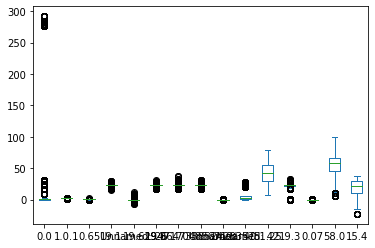

In [29]:
import matplotlib.pyplot as plt
df1[df1.columns].plot(kind='box')